## Семинары 2 и 3. Проверка гипотез о параметрах одной выборки.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import seaborn as sns
sns.set()

### t-test (1 sample)

In [3]:
from scipy.stats import t #распределение Стьюдента

##### Задача 1: Оцениваем средний уровень IQ профессоров университета города N. Можно ли утверждать на уровне значимости 10%, что средний уровень IQ профессоров выше 110 баллов? Данные в файле IQ.txt (решить задачу в предположении нормальности данных).

In [4]:
iq_data = pd.read_csv("IQ.txt")

In [5]:
type(iq_data)

pandas.core.frame.DataFrame

##### Лирическое отступление: несколько примеров операций с DataFrame

In [6]:
iq_data.head(2) #первые 2 строки

,iq
0,114
1,108


In [7]:
iq_data.shape

(50, 1)

In [8]:
iq_data.columns

Index(['iq'], dtype='object')

In [9]:
iq_data.index #по умолчанию индекс по строкам - это RangeIndex от 0 до N-1, где N это количество строк в таблице

RangeIndex(start=0, stop=50, step=1)

In [10]:
iq_data.loc[30:35] #выбираем строки с индексами от 30 до 35 (включительно)

,iq
30,112
31,112
32,110
33,107
34,111
35,114


In [11]:
iq_data.loc[30:35:2]

,iq
30,112
32,110
34,111


In [12]:
iq_data.min()

iq    107
dtype: int64

In [13]:
iq_data.describe()

,iq
count,50.000000
mean,111.580000
std,2.129386
min,107.000000
25%,111.000000
50%,111.000000
75%,113.000000
max,118.000000


In [14]:
iq = iq_data['iq'] #в задаче будем работать только с одним столбцом под названием 'iq'

In [15]:
type(iq) # столбцами в объекте DataFrame выступают объекты Series

pandas.core.series.Series

##### ... и несколько примеров для Series

In [16]:
iq.index

RangeIndex(start=0, stop=50, step=1)

In [17]:
iq.values

array([114, 108, 109, 111, 112, 109, 113, 113, 111, 113, 113, 114, 109,
       113, 111, 112, 111, 109, 114, 109, 114, 111, 111, 113, 118, 112,
       113, 110, 111, 111, 112, 112, 110, 107, 111, 114, 112, 113, 112,
       111, 111, 108, 111, 111, 111, 111, 109, 114, 117, 110])

In [18]:
iq.loc[2:5] #выбираем по индексу

2    109
3    111
4    112
5    109
Name: iq, dtype: int64

In [19]:
iq [iq > 113]

0     114
11    114
18    114
20    114
24    118
35    114
47    114
48    117
Name: iq, dtype: int64

##### Возвращаемся к задаче 1

In [20]:
#iq = iq_data['iq']

Вопрос про среднее и про дисперсию в задаче по условию ничего не известно, значит пользуемся вторым типом задач с нормальной выборкой: t-test


$H_0 : a = a_0 = 110$

$H_1 : a > a_0$

In [21]:
# Проверка теста вручную с помощью построения критического множества и статистики:
alpha = .1 # уровень значимости
n = len(iq) # объем данных
iq_mean = np.mean(iq) # x с чертой
iq_s = np.std(iq, ddof=1) #ddof=1: считаем исправленное(!) ср. кв. отклонение
t_stat = (iq_mean - 110) * np.sqrt(n) / iq_s # t - статистика для проверки гипотезы
t_stat

5.246717100021899

Правосторонняя альтернатива, значит и $C_{kp}$ тоже правостороннее

In [22]:
#Критическое множество для правосторонней альтернативы: от квантиля до бесконечности 
iq_crit = t.ppf(1-alpha, n-1)
iq_crit
#Смотрим, попала статистика в критическое множество или нет, делаем вывод

1.2990687845090696

Так как t_stat попал в луч $[iq\_crit, +\infty]$, то отвергаем $H_0$ в пользу $H_1$. То есть средний IQ правда больше 110

Как посчитать $p\_value$? Для правосторонней альтернативы и для правостороннего луча в $C_{kp}$ по определению это 
$$\mathrm{P}(t(n-1) \geq t\_stat) = 1 - \mathrm{F}_{t(n-1)}(t\_stat)$$

In [23]:
# Можно также вручную посчитать p-value:
t_p_value = 1 - t.cdf(t_stat, n-1)
t_p_value

1.6510433925587265e-06

Получается, что $p\_value < \alpha \Rightarrow $ принимаем $H_1$

In [24]:
"{0:.7f}".format(t_p_value)

'0.0000017'

In [25]:
# Можем записать полученное p-value в файл:
file1 = open("answer.txt","w+") 
file1.write(str(t_p_value))
file1.close()

In [26]:
#Проверка гипотезы с помощью t-теста:
from scipy.stats import ttest_1samp
# Есть только двусторонний (для одностороннего теста делим p-value на 2):
ttest_1samp(iq, popmean=110)[1]

3.3020867852360663e-06

Считаем, что если тест дает значние p_value для своей альтернативы, мы для нашей делим ее на два

##### Задача 2:	В городе Ивановск проведено выборочное исследование доходов жителей. По выборке из 500 человек получено среднее 23800 руб. и среднее квадратическое отклонение 400 руб. Можно ли утверждать на уровне значимости 5%, что средний доход жителей составляет менее 25000 руб? Решить задачу в предположении нормальности данных.

Не знаем дисперсию, гипотеза про $a \Rightarrow t-test$

$H_0: a = a_0 = 25000$

$H_1: a < a_0$

In [27]:
alpha = .05
n = 500
mean_ivan = 23800
s_ivan = 400 * np.sqrt(n) / np.sqrt(n-1) #получим именно исправленное среднее кв. отклонение 
# ищем ее потому что выборка

In [28]:
t_statistics = (mean_ivan - 25000) * np.sqrt(n) / s_ivan
t_statistics

-67.01492371106603

Альренатива левосторонняя, следовательно $C_{kp}=[-\infty, t_{\alpha}]$

Считаем квантиль:

In [29]:
crit_ivan = t.ppf(alpha, n-1)
crit_ivan

-1.6479129840597067

Аналогично наше $p\_value$ принмает значение $\mathrm{F}_{t(n-1)}(t\_statistics)$

In [30]:
ivan_p_value = t.cdf(t_statistics, n-1)
ivan_p_value

5.948735947237364e-252

Во-первых, статистика $t\_statistics$ попала в критическое множество,
во-вторых, $p\_value < \alpha$. Значит верна $H_1$, то есть действительно зарплаты меньше 25к

### Проверка гипотезы о дисперсии нормального распределения

##### Задача 3: Партия изделий принимается, если дисперсия размеров не превышает 0.2. Исправленная выборочная дисперсия для 30 изделий оказалась равной 0.3. Можно ли принять партию на уровне значимости 5%? Решить задачу в предположении нормальности данных.

Гипотезу строим о дисперсии и мат. ожидание неизвестно $\Rightarrow$ 4 тип задачи

$H_0: \sigma^2 = \sigma^2_0 = 0.2$

$H_1: \sigma^2 > \sigma^2_0$

In [31]:
from scipy.stats import chi2

In [32]:
#Проверка гипотезы вручную с помощью построения критического множества и статистики:
alpha = .05
n = 30
s2_izd = 0.3 # исправленная выборочная дисперсия
T = (n-1) * s2_izd / (0.2)
T

43.49999999999999

In [33]:
#Критическое множество для правосторонней альтернативы: от квантиля до бесконечности
crit_izd = chi2.ppf(1-alpha, n-1)
crit_izd
#Смотрим, попала статистика в критическое множество или нет, делаем вывод

42.55696780429269

Статистика попала в критическое множество, значит верна $H_1$, то есть принять новую партию не можем

In [34]:
# p-value:
p_value_izd = 1 - chi2.cdf(T, n-1)
p_value_izd

0.04090600501293307

### Критерий Вальда

##### Задача 4: 

Рассмотрим гамма-распределение с плотностью $f(x) = \frac{\theta^{-\alpha}}{\Gamma(\alpha)} x^{\alpha-1} e^ {\frac{-x}{\theta}}, \ x \ge 0.$

Гипотеза $H_0$: $\alpha \theta = E[X_1] = 1$

Альтернатива $H_1$: $E[X_1] \neq 1$

Будем рассматривать статистику Вальда

$$ T(X) = \frac{\sum_{i=1}^{n}X_i - n\mu}{\sqrt{ns^2}}, \ $$ где $\mu - $ это предполагаемое математическое ожидание (в нашем случае будет $\mu = 1$). 

In [35]:
import numpy as np
from scipy.stats import gamma, norm

In [36]:
def calc_wald_statistics(X, assumed_mean): #статистика Вальда для одной выборки 
    X = np.array(X)
    n = len(X)
    return (X.sum() - n * assumed_mean) / np.sqrt(n * X.var(ddof=1)) 

При $H_0$ статистика Вальда стремится к $N(0, 1)$ с ростом количества элементов выборки. Тест устроен следующим образом:

Двусторонняя альтернатива, критическое множество в две стороны.
Если $|T(X)| > z_{1-\alpha/2}$ (в один из двух лучей $C_{kp}$), то гипотеза $H_0$ отвергается, иначе $H_0$ принимается. Будем проводить тест с уровнем значимости $\alpha = 0.05$. 


In [37]:
alpha = 0.05
norm_threshold = norm.ppf(1.0 - 0.5 * alpha)
norm_threshold

1.959963984540054

Так будет выглядеть статистика, построенная по выборке, удовлетворяющей $H_0$

In [38]:
h0_cws = calc_wald_statistics (gamma.rvs(a = 1, scale = 1, size=2000), 1) #a - это параметр альфа, scale - параметр тета
h0_cws

-1.6650165792533151

Cтатистика, которая удовлетворяет $H_1$

In [39]:
h1_cws = calc_wald_statistics (gamma.rvs(a = 3, scale = 2, size=2000), 1)
h1_cws

65.33413342839002

Асимптотический признак, поэтому $p\_value$ не очень точный

In [40]:
p_value = 2*np.min([ norm.cdf(h0_cws), 1 - norm.cdf(h0_cws) ])
p_value

0.0959094481850775

Но ведь статистика Вальда имеет не нормальное распределение, а лишь стремится к нему, поэтому заявленный уровень значимости (0.05) будет отличаться от истинного. Попробуем оценить истинный уровень значимости.

In [41]:
samples_count = 1000 #объем каждой выборки
iters_count = 10000 #количество выборок

h0_a = 2.0 #параметр альфа
h0_scale = 0.5 #параметр тета
h0_samples = gamma.rvs(a = h0_a, scale = h0_scale, size=(iters_count, samples_count))

In [42]:
type(h0_samples)

numpy.ndarray

In [43]:
h0_samples.shape

(10000, 1000)

In [44]:
def calc_wald_statistics_multirow(X, samples_count, assumed_mean):
#     получим array из статистик Вальда
    X = np.array(X)[:, : samples_count]
    n = X.shape[1] # n=samples_count (объем каждой выборки)
    return (X.sum(axis=1) - n * assumed_mean) / np.sqrt(n * X.var(ddof=1, axis=1)) #axis=1: см. по строкам

In [45]:
h0_stat_values = calc_wald_statistics_multirow(h0_samples, 1000, h0_a * h0_scale)

In [46]:
np.sum(np.abs(h0_stat_values) > norm_threshold) / float(iters_count) #iters_count -- количество выборок

0.0538

Теперь посмотрим на истинный уровень значимости при различных $n$

In [47]:
from tqdm import tqdm

In [48]:
significance_levels = [] #или так: significance_levels = list()

for n in tqdm(range(10, 1000 + 1, 10)):
    h0_stat_values = calc_wald_statistics_multirow(h0_samples, n, h0_a * h0_scale)
    significance_levels.append(np.sum(np.abs(h0_stat_values) > norm_threshold) / float(iters_count))
# append: присоединение нового элемента в конец списка    

100%|██████████| 100/100 [00:05<00:00, 19.81it/s]


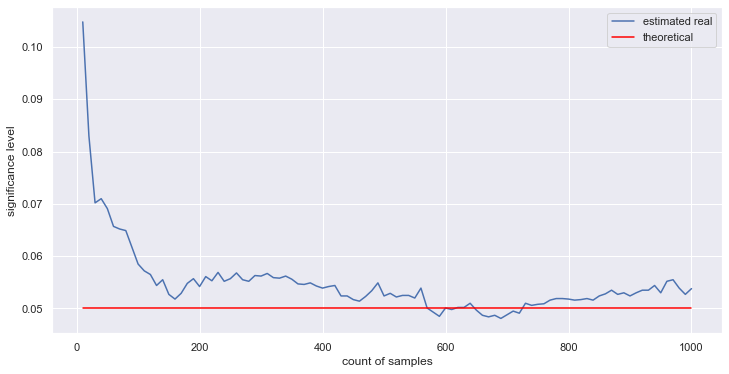

In [49]:
plt.figure(figsize = (12,6))
plt.xlabel("count of samples")
plt.ylabel("significance level")
plt.plot(range(10, 1000 + 1, 10), significance_levels, label="estimated real")
plt.plot(range(10, 1000 + 1, 10), [alpha for i in range(10, 1000 + 1, 10)], color='red', label="theoretical")
plt.legend(loc = 1)
pass

### Метод выборочных квантилей

##### Задача 5: 

Рассмотрим распределение Коши с плотностью $f(x) = \frac{1}{\pi (1 + (x - x_0)^2)}.$

Гипотеза $H_0$: $x_0 = 0$

Альтернатива $H_1$: $x_0 \neq 0$

Мы не можем здесь рассматривать статистику Вальда. Но знаем, что при $H_0$ статистика

$$ T(X) = \frac{\sqrt{n} \widehat{z}_{0.5}}{\frac{\pi}{2}} $$ стремится к $N(0, 1)$ с ростом количества элементов выборки. Тест снова устроен следующим образом:

Если $|T(X)| > z_{1-\alpha/2}$, то гипотеза $H_0$ отвергается, иначе $H_0$ принимается. Проведем тест с уровнем значимости $\alpha = 0.05$. 

In [50]:
from scipy.stats import cauchy

In [51]:
def calc_statistics(X):
    X = np.array(X)
    n=len(X)
    return 2 * np.sqrt(n) * np.percentile(X, 50, interpolation='lower') / (np.pi)

In [52]:
alpha = 0.05
norm_threshold = norm.ppf(1.0 - 0.5 * alpha)
norm_threshold

1.959963984540054

In [53]:
h0_sample = cauchy.rvs(size = 1000)
h0_cs = calc_statistics (h0_sample) 
h0_cs

0.23644100676356072

In [54]:
h1_sample = cauchy.rvs(size = 1000, loc=2)
h1_cs = calc_statistics (h1_sample) 
h1_cs

40.59368739324812

### Непараметрические критерии

##### Задача 6: В городе N проведены выборочные обследования доходов жителей. Проверить на уровне значимости 3% утверждение о том, что средняя зарплата жителей в городе N менее 40000 руб. Данные в файле City.txt. 

В случае непараметрического "среднее" это не мат. ожидание, а медиана. То есть говорим, что зарплаты получены из непрерывного распределения и медианы этих зарплат 40к

$H_0: \theta = \theta_0 = 40000$

$H_1: \theta < \theta_0$

###  Одновыборочный критерий знаков

In [66]:
city = pd.read_csv("City.txt") 
city = city['City']

Модифицируем z

In [67]:
z = city - 40000

In [68]:
z = z[z!=0] #убираем для критерия знаков нулевые элементы Z_i

In [72]:
b = sum(z > 0) #количество Z_i > 0
n = len(z)

#Критерий знаков = бином.критерий с H_0: p=0.5 
from scipy.stats import binom_test
type(binom_test(b, n,  p=0.5))
#так получим p-value для двусторонней альтернативы

numpy.float64

In [70]:
#если данные корректны, для односторонней альтернативы необходимо просто поделить это p-value на 2:
sign_res=binom_test(b, n,  p=0.5)
sign_res/2.0

0.45248726322973076

In [60]:
#или можно посчитать вручную p-value с помощью функции распределения:
from scipy.stats import binom
binom.cdf(b, n, 0.5)

# NB!! Важно понимать, что для правосторонней альтернативы 
# мы должны написать 1 - binom.cdf(b - 1, n, 0.5), т.е. именно b-1, а не просто b из-за дискретности

0.45248726322973076

$p\_value>\alpha \Rightarrow H_0$

##### Асимптотический критерий знаков

In [71]:
#Находим новую статистику:
b_star = (b - n*0.5) / np.sqrt(n*0.25)
#Находим новое p-value (для левосторонней альтернативы!):
from scipy.stats import norm
norm.cdf(b_star, loc=0, scale=1)

0.40553506466695377

### Одновыборочный знако-ранговый критерий Вилкоксона (Wilcoxon signed-rank test)

In [62]:
z = city - 40000

In [63]:
z = z[z!=0] #убираем для критерия знаков нулевые элементы Z_i

In [64]:
from scipy.stats import wilcoxon
#тест использует нормальную аппроксимацию (которую рекомендуется применять при n>20)
wilcoxon(z)
#второе значение результата - это p-value для двусторонней альтернативы

WilcoxonResult(statistic=1080.5, pvalue=0.34310010970365357)

In [65]:
#если данные корректны, для односторонней альтернативы необходимо просто поделить это p-value на 2:
signed_rank_res = wilcoxon(z)
signed_rank_res.pvalue/2.0

0.17155005485182678